In [0]:
#!git clone https://github.com/1adrianb/face-alignment.git #face_alignment

Cloning into 'face_alignment'...
remote: Enumerating objects: 563, done.
remote: Total 563 (delta 0), reused 0 (delta 0), pack-reused 563
Receiving objects: 100% (563/563), 3.51 MiB | 14.75 MiB/s, done.
Resolving deltas: 100% (340/340), done.


In [0]:
!ls

Case#1_1_F_post_Pa_Ro_Sc_Tr_Ep.png
channing_tatum.jpg
data
detection
face-alignment
faceresnet.h5
finalModel128.h5
finalModel2.h5
finalModel_finetune_resnet2.h5
finalModel_finetune_resnet3.h5
finalModel_finetune_resnet.h5
finalModel.h5
finalModel_vgg.h5
__init__.py
model.png
__pycache__
resnet128.h5
resnet2.h5
resnet_finetune128.h5
resnet_finetune.h5
resnet.h5
sharon_stone1.jpg
Swim-Team-Photograph-With-Faces-Detected-using-OpenCV-Cascade-Classifier-After-Some-Tuning-1024x779.png
upload.tar.xz
vgg.h5


In [0]:
%cd /content/drive/"My Drive"/face
# %ls

# import sys
# sys.path.append('/content/drive/"My Drive"/face')

/content/drive/My Drive/face


In [0]:
face_detector = 'sfd'
face_detector_module = __import__('face-alignment.face_alignment.detection.' + face_detector,
                                          globals(), locals(), [face_detector], 0)
face_detector = face_detector_module.FaceDetector(device='cuda', verbose=False)

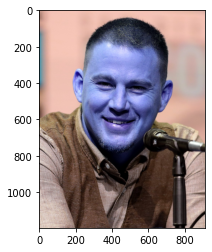

In [0]:
import matplotlib.pyplot as plt 
import cv2
img = cv2.imread("Case#1_1_F_post_Pa_Ro_Sc_Tr_Ep.png")
img = cv2.imread("Swim-Team-Photograph-With-Faces-Detected-using-OpenCV-Cascade-Classifier-After-Some-Tuning-1024x779.png")
img = cv2.imread("channing_tatum.jpg")

img = img[..., :3]
plt.imshow(img)
plt.show()

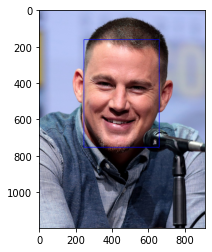

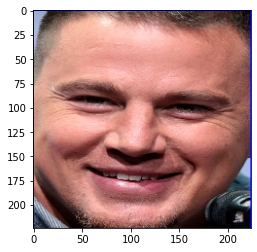

In [0]:
import numpy as np 
faces = face_detector.detect_from_image(img[..., ::-1].copy())
for face in faces:
  face = face.astype(int)
  img = cv2.rectangle(img, (face[0], face[1]), (face[2], face[3]), (255, 0, 0), 2)
  face_crop = cv2.resize(img[face[1]:face[3], face[0]:face[2]], (224, 224))

plt.imshow(img[...,::-1])

plt.figure()
plt.imshow(face_crop[..., ::-1])
plt.show()

In [0]:
import cv2
import os
pwd = os.getcwd()
save_path = pwd + "/data/train/"
data_path = pwd + '/data/'

# crop and scale each face before going through Model
def detect_faces_from_directory(path, nameTag, extensions=['.jpg', '.png'], recursive=True, show_progress_bar=True):
  detected_faces = face_detector.detect_from_directory(path, extensions, recursive, show_progress_bar)
  # print(detected_faces)
  for image_path, bounding_boxes in detected_faces.items():
    filename = nameTag + "_" + image_path.split("/")[-1].split("#")[1].split("_")[0] + ".png"
    print("\nSaving image ", save_path + filename)

    image = cv2.imread(image_path)
    for face in bounding_boxes:
      face = face.astype(int)
      cv2.imwrite(save_path + filename, cv2.resize(image[face[1]:face[3], face[0]:face[2]], (224, 224)))

# detect_faces_from_directory(data_path + "test", "test")      
for nameTag in ["post", "pre"]:
  print("Detecting faces in ", data_path + nameTag)
  detect_faces_from_directory(data_path + nameTag, nameTag)

In [0]:
import glob
import os
pwd = os.getcwd()

# grab the image paths and randomly shuffle them
print("[INFO] loading images...")
image_paths = []
image_paths.extend(glob.glob("data/data/*.png"))
image_paths = sorted(image_paths)

# introduce randomness 
import random
random.seed(85)
random.shuffle(image_paths)

# copy test images to test dir (15%)
import shutil
# print("[INFO] Copying to TEST...")
# for image_path in image_paths[:(int(0.15 * len(image_paths)))]:
#   dest = image_path.split("/")
#   dest[-2] = "test"
#   destination = "/".join(dest)
#   print(image_path, destination)
#   _ = shutil.copyfile(image_path, destination) 

# copy rest to train dir
print("[INFO] Copying to TRAIN...")
for image_path in image_paths[(int(0.15 * len(image_paths))):]:
  dest = image_path.split("/")
  dest[-2] = "train"
  destination = "/".join(dest)
  print(image_path, destination)
  _ = shutil.copyfile(image_path, destination) 


[INFO] loading images...
[INFO] Copying to TRAIN...
data/data/pre_230.png data/train/pre_230.png
data/data/post_226.png data/train/post_226.png
data/data/post_331.png data/train/post_331.png
data/data/pre_125.png data/train/pre_125.png
data/data/pre_160.png data/train/pre_160.png
data/data/pre_309.png data/train/pre_309.png
data/data/pre_151.png data/train/pre_151.png
data/data/post_85.png data/train/post_85.png
data/data/post_324.png data/train/post_324.png
data/data/post_269.png data/train/post_269.png
data/data/post_60.png data/train/post_60.png
data/data/pre_57.png data/train/pre_57.png
data/data/pre_123.png data/train/pre_123.png
data/data/post_286.png data/train/post_286.png
data/data/pre_153.png data/train/pre_153.png
data/data/pre_80.png data/train/pre_80.png
data/data/post_125.png data/train/post_125.png
data/data/post_14.png data/train/post_14.png
data/data/post_4.png data/train/post_4.png
data/data/pre_40.png data/train/pre_40.png
data/data/pre_351.png data/train/pre_351.png

In [0]:
import numpy as np
from keras import backend as K


def preprocess_input(x, data_format=None, version=1):
    x_temp = np.copy(x)
    x_temp = np.array(x_temp, dtype="float")

    if data_format is None:
        data_format = K.image_data_format()
    assert data_format in {'channels_last', 'channels_first'}

    if version == 1:
        if data_format == 'channels_first':
            x_temp = x_temp[:, ::-1, ...]
            x_temp[:, 0, :, :] -= 93.5940
            x_temp[:, 1, :, :] -= 104.7624
            x_temp[:, 2, :, :] -= 129.1863
        else:
            # x_temp = x_temp[..., ::-1]
            x_temp[..., 0] -= 93.5940
            x_temp[..., 1] -= 104.7624
            x_temp[..., 2] -= 129.1863

    elif version == 2:
        if data_format == 'channels_first':
            x_temp = x_temp[:, ::-1, ...]
            x_temp[:, 0, :, :] -= 91.4953
            x_temp[:, 1, :, :] -= 103.8827
            x_temp[:, 2, :, :] -= 131.0912
        else:
            if x_temp.shape[-1] == 4:
              x_temp = x_temp[..., ::-1]
            x_temp[..., 0] -= 91.4953
            x_temp[..., 1] -= 103.8827
            x_temp[..., 2] -= 131.0912
    else:
        raise NotImplementedError

    return x_temp


In [0]:
import os
import numpy as np
import glob 
import cv2
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tqdm import tqdm

pwd = os.getcwd()
base_dir = pwd + "/data"

train_dir = os.path.join(base_dir, 'train')

# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.1,
        height_shift_range=0.08,
        # rescale=1./255,
        # shear_range=0.2,
        zoom_range=-0.1,
        brightness_range=[0.2,1.0],
        horizontal_flip=True,
        fill_mode='nearest')

paths = []
paths.extend(glob.glob(train_dir + "/*.png"))

j = 0
# generate and save images for preview dir
for path in paths:
  i = 0
  nameTag = path.split("/")[-1].split(".")[0]
  print(nameTag)
  img = load_img(path)
  x = img_to_array(img)
  x = x.reshape((1,) + x.shape)

  for batch in train_gen.flow(x, batch_size=1,
                # target_size=(224, 224),
                save_to_dir=pwd + '/data/train', 
                save_prefix=nameTag, 
                save_format='png'):
  
    i += 1
    if i> 31 :
      break
      i += 1
  # j += 1
  # if j> 1 :
  #   break

  


# i = 0
# for batch in train_gen.flow(x, batch_size=32,
#                           # target_size=(224, 224),
#                           save_to_dir=pwd + '/data/preview', 
#                           save_prefix='pox', 
#                           save_format='png'):
#     i += 1
#     if i > 100:
#         break  # otherwise the generator would loop indefinitely

pre_230
post_226
post_331
pre_125
pre_160
pre_309
pre_151
post_85
post_324
post_269
post_60
pre_57
pre_123
post_286
pre_153
pre_80
post_125
post_14
post_4
pre_40
pre_351
post_245
post_67
post_352
post_290
pre_308
post_10
post_270
post_96
pre_185
post_342
pre_200
pre_55
pre_304
pre_168
post_130
pre_83
post_158
post_219
pre_181
post_152
post_114
pre_345
post_182
post_293
pre_30
pre_139
post_29
post_113
pre_126
post_376
post_243
pre_95
post_321
post_54
pre_303
pre_211
post_298
pre_50
pre_134
pre_265
post_143
pre_22
post_224
post_140
post_212
post_344
post_30
pre_124
pre_59
post_178
pre_130
pre_361
post_168
pre_34
pre_63
post_131
pre_242
pre_111
post_313
pre_47
post_170
post_120
pre_28
pre_24
post_32
pre_313
pre_26
pre_75
post_325
pre_192
pre_352
post_299
post_204
post_267
pre_116
post_147
pre_18
post_238
post_100
post_71
post_268
post_185
pre_173
post_210
post_317
post_134
pre_266
post_310
pre_350
post_179
post_188
pre_165
pre_317
post_153
pre_241
pre_245
post_121
pre_244
post_91
pre_214


In [0]:
!ls -F ./data/train |grep -v / | wc -l
# !ls ./data/train

21092


In [41]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import glob 
import cv2
from tqdm import tqdm

pwd = os.getcwd()
base_dir = pwd + "/data"

train_dir = os.path.join(base_dir, 'train')

# grab labels
import pandas as pd
post_labels = pd.read_csv("data/labels/post/labels.csv").values.tolist()
pre_labels = pd.read_csv("data/labels/pre/labels.csv").values.tolist()

# get train data + train labels
# grab the image paths and randomly shuffle them
print("[INFO] loading TRAIN images...")
trainPaths = []
trainPaths.extend(glob.glob(train_dir + "/*.png"))

trainX = []
trainY = []
for trainPath in tqdm(trainPaths):
  i = 0
  # load image 
  image = load_img(trainPath)
  image = img_to_array(image)
  trainX.append(image)

  # load label
  nameTag = trainPath.split("/")[-1].split("_")[0]
  d = trainPath.split("/")[-1].split("_")[1]
  if "." in d:
    case_nb = int(d.split(".")[0])
  else:
    case_nb = int(d)
  # print(case_nb)
  # break

  if nameTag == 'pre':
    label = pre_labels[case_nb - 1]
  if nameTag == "post":
    label = post_labels[case_nb - 1]

  if (len(label)):
    trainY.append(label)
    label = []
  else:
    raise ValueError('Label is empty')
  



print(len(trainX), len(trainY))
print(trainY)


# img = load_img(pwd + '/data/data/post_1.png')  # this is a PIL image
# x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
# x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)


# generate and save images for preview dir
# i = 0
# for batch in train_gen.flow(x, batch_size=batch_size,
#                           # target_size=(224, 224),
#                           save_to_dir=pwd + '/data/preview', 
#                           save_prefix='pox', 
#                           save_format='png'):
#     i += 1
#     if i > 100:
#         break  # otherwise the generator would loop indefinitely

  6%|▌         | 36/640 [00:00<00:01, 356.47it/s]

[INFO] loading TRAIN images...


100%|██████████| 640/640 [00:01<00:00, 341.33it/s]

640 640
[[1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1], [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], [0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1], [1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0], [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,

In [0]:
import keras
from skimage.io import imread

pwd = os.getcwd()
train_dir = pwd + "/data/train"

class My_Custom_Generator(keras.utils.Sequence) :
  
  def __init__(self, image_filenames, labels, batch_size) :
    self.image_filenames = image_filenames
    self.labels = labels
    self.batch_size = batch_size
    
    
  def __len__(self) :
    return (np.ceil(len(self.image_filenames) / float(self.batch_size))).astype(np.int)
  
  
  def __getitem__(self, idx) :
    batch_x = self.image_filenames[idx * self.batch_size : (idx+1) * self.batch_size]
    batch_y = self.labels[idx * self.batch_size : (idx+1) * self.batch_size]

    return np.array(preprocess_input([imread(str(file_name)) for file_name in batch_x], version=2)), np.array(batch_y)

In [0]:
training_batch_gen = My_Custom_Generator(trainPaths, trainY, batch_size=512)


In [35]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import glob 
import cv2
from tqdm import tqdm

pwd = os.getcwd()
base_dir = pwd + "/data"

test_dir = os.path.join(base_dir, 'test')

# grab labels
import pandas as pd
post_labels = pd.read_csv("data/labels/post/labels.csv").values.tolist()
pre_labels = pd.read_csv("data/labels/pre/labels.csv").values.tolist()

# get test data + test labels
# grab the image paths and randomly shuffle them
print("[INFO] loading TEST images...")
testPaths = []
testPaths.extend(glob.glob(test_dir + "/*.png"))

testX = []
testY = []
for testPath in tqdm(testPaths):
  # load image 
  image = cv2.imread(testPath)
  image = img_to_array(image)
  testX.append(image)

  # load label
  nameTag = testPath.split("/")[-1].split("_")[0]
  case_nb = int(testPath.split("/")[-1].split("_")[1].split(".")[0])

  if nameTag == 'pre':
    label = pre_labels[case_nb - 1]
  if nameTag == "post":
    label = post_labels[case_nb - 1]
    
  if (len(label)):
    testY.append(label)
    label = []
  else:
    raise ValueError('Label is empty')


print(len(testX), len(testY))
print(testY)

 25%|██▌       | 28/112 [00:00<00:00, 272.88it/s]

[INFO] loading TEST images...


100%|██████████| 112/112 [00:00<00:00, 271.42it/s]

112 112
[[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], [1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1], [1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0], [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1], [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,

In [0]:
import numpy as np 
trainX = np.array(trainX, dtype="float")
trainY = np.array(trainY)
testX = np.array(testX, dtype="float")
testY = np.array(testY)

trainX_processed = preprocess_input(trainX, version=2)
testX_processed = preprocess_input(testX, version=2)


In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

batch_size = 16

# this is the augmentation configuration we will use for training
train_gen = ImageDataGenerator(
        rotation_range=45,
        width_shift_range=0.1,
        height_shift_range=0.08,
        rescale=1./255,
        # shear_range=0.2,
        zoom_range=-0.1,
        brightness_range=[0.2,1.0],
        horizontal_flip=True,
        fill_mode='nearest')

# this is the augmentation configuration we will use for testing:
# only rescaling
test_gen = ImageDataGenerator(rescale=1./255)

sample_count = 2500 
 

# def extract_features(directory, sample_count):
#     features = np.zeros(shape=(sample_count, 4, 4, 512))
#     labels = np.zeros(shape=(sample_count))
#     generator = datagen.flow_from_directory(
#         directory,
#         target_size=(224, 224),
#         batch_size=batch_size,
#         class_mode='binary')
#     i = 0
#     for inputs_batch, labels_batch in generator:
#         features_batch = conv_base.predict(inputs_batch)
#         features[i * batch_size : (i + 1) * batch_size] = features_batch
#         labels[i * batch_size : (i + 1) * batch_size] = labels_batch
#         i += 1
#         if i * batch_size >= sample_count:
#             # Note that since generators yield data indefinitely in a loop,
#             # we must `break` after every image has been seen once.
#             break
#     return features, labels

# train_features, train_labels = extract_features(train_dir, 2000)
# test_features, test_labels = extract_features(test_dir, 1000)

In [30]:
!sudo pip install git+https://github.com/rcmalli/keras-vggface.git


  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-68q8huu_
  Running command git clone -q https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-68q8huu_
  Created wheel for keras-vggface: filename=keras_vggface-0.6-cp36-none-any.whl size=8311 sha256=3fb73ab1f63fab230de0265d9b9213cb8f1aa95f0f58ffcc1c6d2e245526506d
  Stored in directory: /tmp/pip-ephem-wheel-cache-q5ckk7bd/wheels/36/07/46/06c25ce8e9cd396dabe151ea1d8a2bc28dafcb11321c1f3a6d
Successfully built keras-vggface


In [38]:
from keras_vggface.vggface import VGGFace
from keras.engine import  Model
from keras.layers import Flatten, Dense, Input, Dropout
from keras_vggface.vggface import VGGFace
from keras import regularizers


# create a vggface2 model
model = []
del model
resnet_model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3))#, pooling='max')
# freeze vgg layers
for layer in resnet_model.layers:
  layer.trainable = False
# add output layers
last_layer = resnet_model.get_layer("avg_pool").output
x = Flatten(name='flatten')(last_layer)
x = Dense(256, activation='relu', name='fc6')(x)
x = Dropout(0.3, name ='dropout')(x)
# x = Dense(128, activation='relu', name='fc7')(x)
# x = Dropout(0.6, name ='dropout2')(x)
out = Dense(22, activation='sigmoid', name='fc8')(x)
model = Model(resnet_model.input, out)

# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

Inputs: [<tf.Tensor 'input_3:0' shape=(None, 224, 224, 3) dtype=float32>]
Outputs: [<tf.Tensor 'fc8_6/Sigmoid:0' shape=(None, 22) dtype=float32>]


In [39]:
#from keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')
# resnet_model.summary()
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_3[0][0]                    
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_99 (Activation)      (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________________

In [45]:
from keras.optimizers import RMSprop, Adam
from keras.callbacks import ModelCheckpoint


# optimizer
# opt = RMSprop()
opt = Adam(lr = 0.001)

# compile the model using binary cross-entropy rather than
# categorical cross-entropy -- this may seem counterintuitive for
# multi-label classification, but keep in mind that the goal here
# is to treat each output label as an independent Bernoulli
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

batch_size = 64
EPOCHS = 150


mcp = ModelCheckpoint(os.path.join(pwd + "/resnetScaled.h5"), monitor='val_loss',
                      save_best_only=True, save_weights_only=False, period=1)

# train the network
print("[INFO] training network...")
H = model.fit_generator(
	# training_batch_gen,
	train_gen.flow(trainX_processed, trainY, batch_size=batch_size),
	# trainX_processed, trainY, batch_size=batch_size,
	validation_data=(testX_processed, testY),
	steps_per_epoch=len(trainY) *1// batch_size,
	epochs=EPOCHS, verbose=1,
  callbacks=[mcp])


model.save("finalModelScaled.h5")

[INFO] training network...
Epoch 1/150
10/10 [==============================] - 14s 1s/step - loss: 0.4774 - accuracy: 0.7648 - val_loss: 0.6174 - val_accuracy: 0.7281
Epoch 2/150
10/10 [==============================] - 7s 704ms/step - loss: 0.4575 - accuracy: 0.7794 - val_loss: 0.5980 - val_accuracy: 0.7346
Epoch 3/150
10/10 [==============================] - 9s 885ms/step - loss: 0.4405 - accuracy: 0.7884 - val_loss: 0.6368 - val_accuracy: 0.7394
Epoch 4/150
10/10 [==============================] - 9s 900ms/step - loss: 0.4218 - accuracy: 0.7976 - val_loss: 0.6349 - val_accuracy: 0.7305
Epoch 5/150
10/10 [==============================] - 9s 887ms/step - loss: 0.4146 - accuracy: 0.8041 - val_loss: 0.6475 - val_accuracy: 0.7220
Epoch 6/150
10/10 [==============================] - 9s 888ms/step - loss: 0.3981 - accuracy: 0.8150 - val_loss: 0.6498 - val_accuracy: 0.7374
Epoch 7/150
10/10 [==============================] - 9s 884ms/step - loss: 0.3937 - accuracy: 0.8129 - val_loss: 0.63

KeyboardInterrupt: ignored

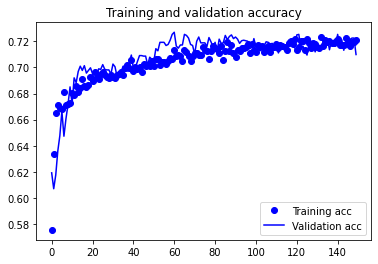

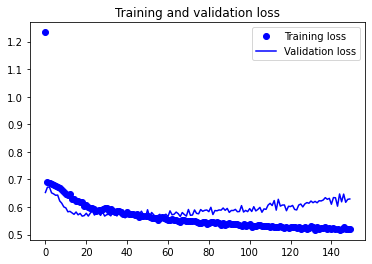

In [0]:
import matplotlib.pyplot as plt

history = H
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
test_loss, test_acc = model.evaluate_generator(test_gen.flow(testX_processed, testY),
                                               steps=50)
print('test acc:', test_acc)
print('test Loss:', test_loss)


test acc: 0.7100334763526917
test Loss: 0.6008586287498474


In [0]:
resnet_model.trainable = True

set_trainable = False
for layer in resnet_model.layers:
    if layer.name == 'conv5_3_1x1_increase':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
model.compile(loss="binary_crossentropy", optimizer=RMSprop(lr=1e-5),
	metrics=["accuracy"])
model.summary()

Model: "model_27"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_30 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_30[0][0]                   
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_1239 (Activation)    (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
___________________________________________________________________________________________

In [0]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint

# compile the model using binary cross-entropy rather than
# categorical cross-entropy -- this may seem counterintuitive for
# multi-label classification, but keep in mind that the goal here
# is to treat each output label as an independent Bernoulli
# distribution
# model.compile(loss="binary_crossentropy", optimizer=RMSprop(lr=1e-5),
# 	metrics=["accuracy"])

# batch_size = 32
EPOCHS = 100


mcp = ModelCheckpoint(os.path.join(pwd + "/resnet_finetune128.h5"), monitor='val_loss',
                      save_best_only=True, save_weights_only=False, period=1)

# train the network
print("[INFO] training network...")
H2 = model.fit( #_generator(
		trainX_processed, trainY, batch_size=batch_size,
	# train_gen.flow(trainX_processed, trainY, batch_size=batch_size),
	validation_data=(testX_processed, testY),
	# steps_per_epoch=len(trainX_processed) // batch_size,
	epochs=EPOCHS, verbose=1,
  callbacks=[mcp])


model.save("finalModel_finetune_resnet3.h5")

[INFO] training network...
Train on 640 samples, validate on 112 samples
Epoch 1/100
640/640 [==============================] - 5s 8ms/step - loss: 0.5145 - accuracy: 0.7232 - val_loss: 0.6258 - val_accuracy: 0.7110
Epoch 2/100
640/640 [==============================] - 2s 4ms/step - loss: 0.5136 - accuracy: 0.7229 - val_loss: 0.6253 - val_accuracy: 0.7127
Epoch 3/100
640/640 [==============================] - 2s 4ms/step - loss: 0.5171 - accuracy: 0.7210 - val_loss: 0.6254 - val_accuracy: 0.7139
Epoch 4/100
640/640 [==============================] - 2s 4ms/step - loss: 0.5178 - accuracy: 0.7207 - val_loss: 0.6218 - val_accuracy: 0.7167
Epoch 5/100
640/640 [==============================] - 2s 4ms/step - loss: 0.5146 - accuracy: 0.7216 - val_loss: 0.6188 - val_accuracy: 0.7155
Epoch 6/100
640/640 [==============================] - 2s 4ms/step - loss: 0.5197 - accuracy: 0.7203 - val_loss: 0.6178 - val_accuracy: 0.7163
Epoch 7/100
640/640 [==============================] - 2s 4ms/step - 

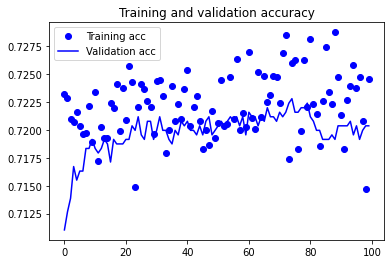

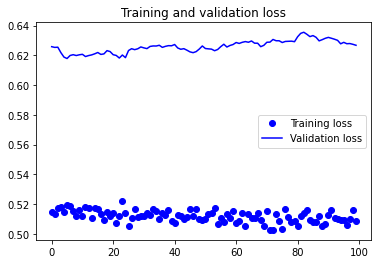

In [0]:
import matplotlib.pyplot as plt

history = H2
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
from keras_vggface.utils import preprocess_input
from keras_vggface.utils import decode_predictions

# convert one face into samples
pixels = face_crop.astype('float32')
samples = np.expand_dims(pixels, axis=0)
# prepare the face for the model, e.g. center pixels
samples = preprocess_input(samples, version=2)

# perform prediction
yhat = model.predict(samples)

# convert prediction into names
results = decode_predictions(yhat)
# display most likely results
for result in results[0]:
	print('%s: %.3f%%' % (result[0], result[1]*100))

b' Samantha_Ruth_Prabhu': 14.426%
b' Juggan_Kazim': 7.105%
b' Sridevi': 5.505%
b' Mahira_Khan': 5.046%
b' Jennifer_Winget': 4.360%


In [3]:
%cd /content/drive/"My Drive"/face


/content/drive/My Drive/face


In [46]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os
import glob 
import cv2
from tqdm import tqdm

pwd = os.getcwd()
base_dir = pwd + "/data"

test_dir = os.path.join(base_dir, 'data')

# grab labels
import pandas as pd
post_labels = pd.read_csv("data/labels/post/labels.csv").values.tolist()
pre_labels = pd.read_csv("data/labels/pre/labels.csv").values.tolist()

# get test data + test labels
# grab the image paths and randomly shuffle them
print("[INFO] loading TEST images...")
testPaths = []
testPaths.extend(glob.glob(test_dir + "/*.png"))
testPaths = sorted(testPaths)
testX = []
testY = []
for testPath in tqdm(testPaths):
  # load image 
  image = cv2.imread(testPath)
  image = img_to_array(image)
  testX.append(image)

  # load label
  nameTag = testPath.split("/")[-1].split("_")[0]
  case_nb = int(testPath.split("/")[-1].split("_")[1].split(".")[0])

  if nameTag == 'pre':
    label = pre_labels[case_nb - 1]
  if nameTag == "post":
    label = post_labels[case_nb - 1]

  if (len(label)):
    testY.append(label)
    label = []
  else:
    raise ValueError('Label is empty')


print(len(testX), len(testY))
print(testY)

  3%|▎         | 26/752 [00:00<00:02, 253.43it/s]

[INFO] loading TEST images...


100%|██████████| 752/752 [00:03<00:00, 247.71it/s]

752 752
[[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0], [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1], [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1], [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], [0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0], [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1], [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0], [1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], [0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1], [1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1], [1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1], [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [0]:
import numpy as np 

testX = np.array(testX, dtype="float")
testY = np.array(testY)

testX_processed = preprocess_input(testX, version=2)

In [0]:
from keras.models import load_model
model = load_model('finalModel_finetune_resnet.h5')


In [19]:
test_gen = ImageDataGenerator()
test_loss, test_acc = model.evaluate_generator(test_gen.flow(testX_processed, testY),
                                               steps=50)
print('test acc:', test_acc)
print('test Loss:', test_loss)

test acc: 0.9099313616752625
test Loss: 0.3499758243560791


In [48]:
# predict = model.predict_generator(test_gen.flow(testX_processed, testY))
predict = model.predict(testX_processed)
print(predict.shape)
np.save("finalModel_resnet_finetune.npy", predict)


(752, 22)


In [20]:
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1/7x7_s2 (Conv2D)           (None, 112, 112, 64) 9408        input_11[0][0]                   
__________________________________________________________________________________________________
conv1/7x7_s2/bn (BatchNormaliza (None, 112, 112, 64) 256         conv1/7x7_s2[0][0]               
__________________________________________________________________________________________________
activation_504 (Activation)     (None, 112, 112, 64) 0           conv1/7x7_s2/bn[0][0]            
____________________________________________________________________________________________

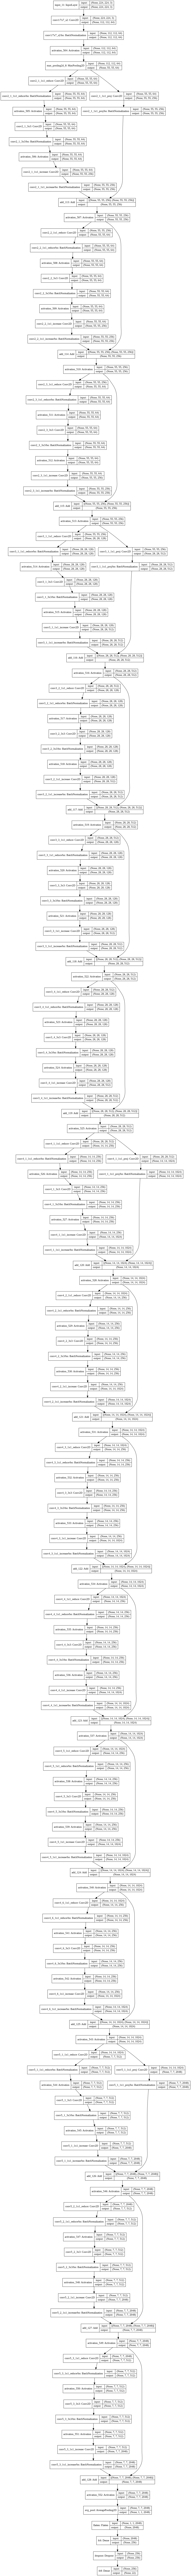

In [5]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')